In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random

from tensorflow.python.keras import layers

In [ ]:
def plot_images(images):

  fig = plt.figure(figsize=(4, 10))
  for i in range(40):
    number = i//4 
    plt.subplot(10, 4, i+1)
    plt.imshow(images[number][i])
    plt.axis('off')

In [ ]:
def plot_bar(images):

  labels = []
  index = range(0,10)
  for dataset in images:
    labels.append(dataset.shape[0])

  plt.figure(figsize=(15,7))
  plt.bar(index, labels, width = 0.6)
  plt.show()

In [ ]:
def resize_data(data, compteur, minimum):

  random_generator = np.random.default_rng()
  shape = data.shape
  difference = data.shape[0] - minimum
  to_delete  = random_generator.choice(data.shape[0], size=difference, replace=False)

  data = np.delete(data, to_delete, axis=0)
  #print("Resizing:")
  #print(shape, " -> ", data.shape, "\n")
    
  return data

In [ ]:
# we can probably merge these two function
def cut_data(data, mask):

  random_generator = np.random.default_rng()

  for index, category in enumerate(data):

    size = int(category.shape[0] * (1 - mask[index]))
    shape = category.shape
    to_delete  = random_generator.choice(category.shape[0], size=size, replace=False)
    data[index] = np.delete(category, to_delete, axis=0)
    #print("Resizing:")
    #print(shape, " -> ", data[index].shape, "\n")
  
  return data

In [ ]:
def prepare_data(mask):

  # importing MNIST
  (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

  images = np.concatenate((train_images, test_images))
  labels = np.append(train_labels, test_labels)

  """
  print("------------------------------------------------")
  print("images.shape   :    ", images.shape)
  print("------------------------------------------------")
  print("labels.shape   :    ", labels.shape)
  print("------------------------------------------------")
  """

  # could be optimized but I wanted to get something clean and lisible
  images_zero   = images[np.argwhere(labels==0)].squeeze()
  images_one    = images[np.argwhere(labels==1)].squeeze()
  images_two    = images[np.argwhere(labels==2)].squeeze()
  images_three  = images[np.argwhere(labels==3)].squeeze()
  images_four   = images[np.argwhere(labels==4)].squeeze()
  images_five   = images[np.argwhere(labels==5)].squeeze()
  images_six    = images[np.argwhere(labels==6)].squeeze()
  images_seven  = images[np.argwhere(labels==7)].squeeze()
  images_eight  = images[np.argwhere(labels==8)].squeeze()
  images_nine   = images[np.argwhere(labels==9)].squeeze()
  set_images = [images_zero, images_one, images_two, images_three, images_four, images_five, images_six, images_seven, images_eight, images_nine]

  # observing the sizes and finding the minimum size, aswell as the total (should be 70000 every time)
  counting = 0
  for index, dataset in enumerate(set_images):
    counting += dataset.shape[0]
    #print("for the category:", index, "  |  shape of the category:", dataset.shape)

  #print("\ncounting = ", counting)

  minimum = counting
  for dataset in set_images:
    if dataset.shape[0] < minimum: minimum = dataset.shape[0]
  #print("\nminimum = ", minimum)

  #plot_images(set_images)
  #plot_bar(set_images)

  for index, dataset in enumerate(set_images):
    dataset = resize_data(dataset, counting, minimum)
  set_images[index] = dataset

  #plot_bar(set_images)

  non_iid_data = cut_data(set_images, mask)

  plot_bar(non_iid_data)

  return non_iid_data

In [ ]:
# importing MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

images = np.concatenate((train_images, test_images))
labels = np.append(train_labels, test_labels)

print("------------------------------------------------")
print("images.shape   :    ", images.shape)
print("------------------------------------------------")
print("labels.shape   :    ", labels.shape)
print("------------------------------------------------")

11501568/11490434 [==============================] - 0s 0us/step
------------------------------------------------
images.shape   :     (70000, 28, 28)
------------------------------------------------
labels.shape   :     (70000,)
------------------------------------------------


In [ ]:
# could be optimized but I wanted to get something clean and lisible

images_zero   = images[np.argwhere(labels==0)].squeeze()
images_one    = images[np.argwhere(labels==1)].squeeze()
images_two    = images[np.argwhere(labels==2)].squeeze()
images_three  = images[np.argwhere(labels==3)].squeeze()
images_four   = images[np.argwhere(labels==4)].squeeze()
images_five   = images[np.argwhere(labels==5)].squeeze()
images_six    = images[np.argwhere(labels==6)].squeeze()
images_seven  = images[np.argwhere(labels==7)].squeeze()
images_eight  = images[np.argwhere(labels==8)].squeeze()
images_nine   = images[np.argwhere(labels==9)].squeeze()

set_images = [images_zero, images_one, images_two, images_three, images_four, images_five, images_six, images_seven, images_eight, images_nine]

In [ ]:
# observing the sizes and finding the minimum size, aswell as the total (should be 70000 every time)
counting = 0
for index, dataset in enumerate(set_images):
  counting += dataset.shape[0]
  print("for the category:", index, "  |  shape of the category:", dataset.shape)

print("\ncounting = ", counting)

minimum = counting
for dataset in set_images:
  if dataset.shape[0] < minimum: minimum = dataset.shape[0]
print("\nminimum = ", minimum)

for the category: 0   |  shape of the category: (6903, 28, 28)
for the category: 1   |  shape of the category: (7877, 28, 28)
for the category: 2   |  shape of the category: (6990, 28, 28)
for the category: 3   |  shape of the category: (7141, 28, 28)
for the category: 4   |  shape of the category: (6824, 28, 28)
for the category: 5   |  shape of the category: (6313, 28, 28)
for the category: 6   |  shape of the category: (6876, 28, 28)
for the category: 7   |  shape of the category: (7293, 28, 28)
for the category: 8   |  shape of the category: (6825, 28, 28)
for the category: 9   |  shape of the category: (6958, 28, 28)

counting =  70000

minimum =  6313


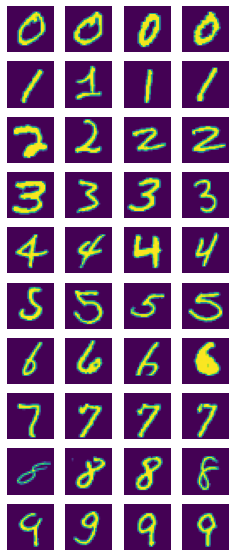

In [ ]:
plot_images(set_images)

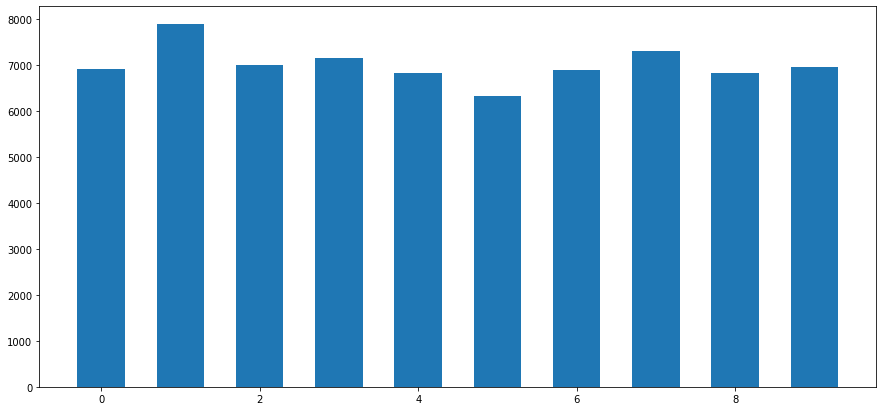

In [ ]:
# distribution of the labels
plot_bar(set_images)

As we can see, even on the original version of the MNIST, the data is not IID since the probability is not identical, we loose the identicaly distributed part of IID.
<br/>
<br/>
let's make the dataset IID, by taking the smallest category and adapting everything

In [ ]:
for index, dataset in enumerate(set_images):
  dataset = resize_data(dataset, counting, minimum)
  set_images[index] = dataset

Resizing:
(6903, 28, 28)  ->  (6313, 28, 28) 

Resizing:
(7877, 28, 28)  ->  (6313, 28, 28) 

Resizing:
(6990, 28, 28)  ->  (6313, 28, 28) 

Resizing:
(7141, 28, 28)  ->  (6313, 28, 28) 

Resizing:
(6824, 28, 28)  ->  (6313, 28, 28) 

Resizing:
(6313, 28, 28)  ->  (6313, 28, 28) 

Resizing:
(6876, 28, 28)  ->  (6313, 28, 28) 

Resizing:
(7293, 28, 28)  ->  (6313, 28, 28) 

Resizing:
(6825, 28, 28)  ->  (6313, 28, 28) 

Resizing:
(6958, 28, 28)  ->  (6313, 28, 28) 



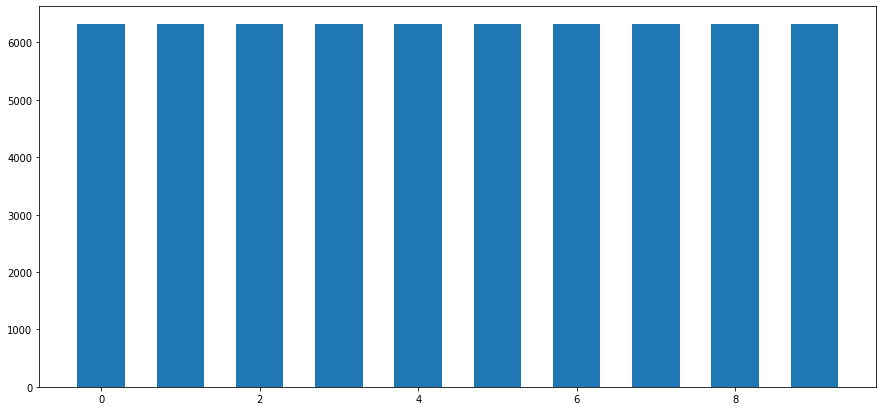

In [ ]:
plot_bar(set_images)

It looks good now! Note that the elements deleted are selected randomly
<br/>
<br/>
Now let's try to modify our dataset as we want, we will create a mask that will modify the percentage of each category:

In [ ]:
# creation of a arbitrarily list of percentage
# /!\ modify the mask below to modify the final dataset /!\
mask = [0.5, 0.3, 0.7, 0.9, 0.2, 0.1, 0.6, 1, 0.4, 0.8]   # we will keep the percentage of data indicated by the mask, one Integer per category
non_iid_data = cut_data(set_images, mask)

Resizing:
(6313, 28, 28)  ->  (3157, 28, 28) 

Resizing:
(6313, 28, 28)  ->  (1894, 28, 28) 

Resizing:
(6313, 28, 28)  ->  (4420, 28, 28) 

Resizing:
(6313, 28, 28)  ->  (5682, 28, 28) 

Resizing:
(6313, 28, 28)  ->  (1263, 28, 28) 

Resizing:
(6313, 28, 28)  ->  (632, 28, 28) 

Resizing:
(6313, 28, 28)  ->  (3788, 28, 28) 

Resizing:
(6313, 28, 28)  ->  (6313, 28, 28) 

Resizing:
(6313, 28, 28)  ->  (2526, 28, 28) 

Resizing:
(6313, 28, 28)  ->  (5051, 28, 28) 



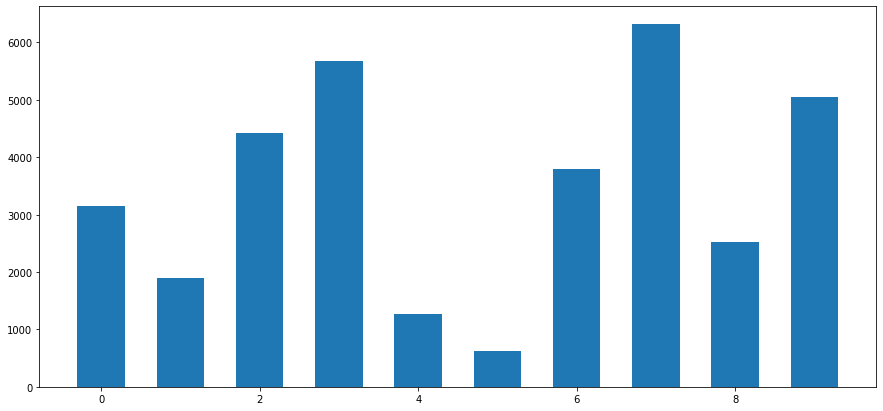

In [ ]:
plot_bar(non_iid_data)

Now our data is (once again) non-iid, but this time the difference is that we did that voluntarily, and we choose the percantage. We can now work on this data to create and analyse anything we want.

---

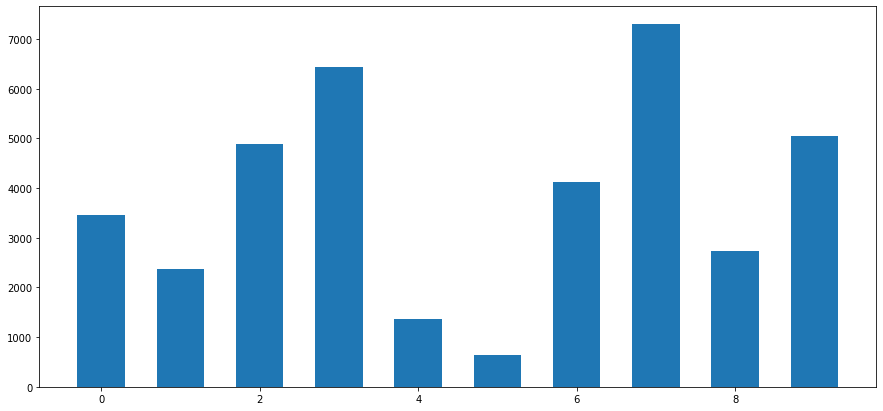

In [ ]:
# with one function call:

mask = [0.5, 0.3, 0.7, 0.9, 0.2, 0.1, 0.6, 1, 0.4, 0.8]
data = prepare_data(mask)